# Porject Name

Team:
1. Renee Dhanaraj
2. Aditi Verma
3. Chris Park
4. Aryan Ahuja

In [ ]:
# sklearn imports
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, mean_squared_error, f1_score

# data manipulation imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


ModuleNotFoundError: No module named 'pandas'

## Importing dataset

In [104]:
original_dataset_df = pd.read_csv('dataset/dataset.csv')
original_dataset_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Cleaning

In [105]:
# creating a copy to clean to avoid contamination of original data
df = original_dataset_df.copy()

In [106]:
# information about the dataset, such as number of entries, column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [107]:
# getting the summary statistics of the dataset (of numerical features)
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [108]:
# checking for missing values in each column
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [109]:
# dropping all the rows with any missing/null values since there are very few
df = df.dropna()

# dropping unnecessary columns that won't help in prediction like id
df = df.drop(columns=["Unnamed: 0", "track_id"])

# IF WE PLAN TO NOT USE NLP FOR NATURAL LANGUAGE PROCESSING, UNCOMMENT AND DROP TEXT COLUMNS
# df = df.drop(columns=["artists", "album_name", "track_name", "track_genre"])

# making sure the "explicit" column is of type integer and not boolean
df["explicit"] = df["explicit"].astype(int)

In [110]:
# sanity checks for the important numeric columns
print("Popularity range:", df["popularity"].min(), "to", df["popularity"].max())
print("Duration range (ms):", df["duration_ms"].min(), "to", df["duration_ms"].max())
print("Tempo range:", df["tempo"].min(), "to", df["tempo"].max())
print("Loudness range:", df["loudness"].min(), "to", df["loudness"].max())

# duplicate check
duplicates_mask = df.duplicated(subset=["artists", "album_name", "track_name"])
print("Number of duplicate entries based on artists, album_name, track_name:", duplicates_mask.sum())


Popularity range: 0 to 100
Duration range (ms): 8586 to 5237295
Tempo range: 0.0 to 243.372
Loudness range: -49.531 to 4.532
Number of duplicate entries based on artists, album_name, track_name: 24620


In [111]:
# sanity checks for categorical columns
print("Explicit values:", df["explicit"].value_counts())
print("\nMode values:", df["mode"].value_counts())
print("\nTime signature values:", df["time_signature"].value_counts())
print("\nKey values:", df["key"].value_counts().sort_index())



Explicit values: explicit
0    104252
1      9747
Name: count, dtype: int64

Mode values: mode
1    72681
0    41318
Name: count, dtype: int64

Time signature values: time_signature
4    101842
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

Key values: key
0     13061
1     10772
2     11644
3      3570
4      9008
5      9368
6      7921
7     13244
8      7360
9     11313
10     7456
11     9282
Name: count, dtype: int64


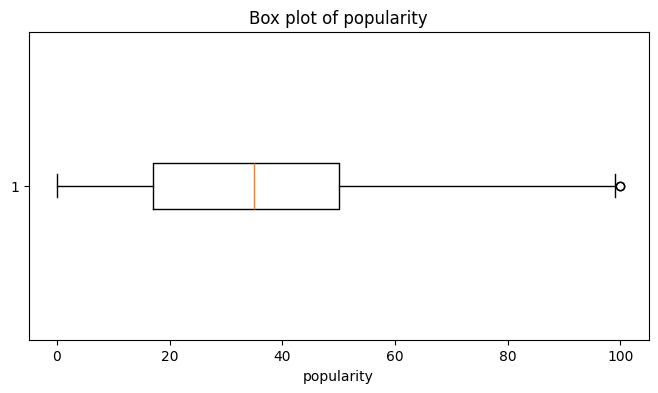

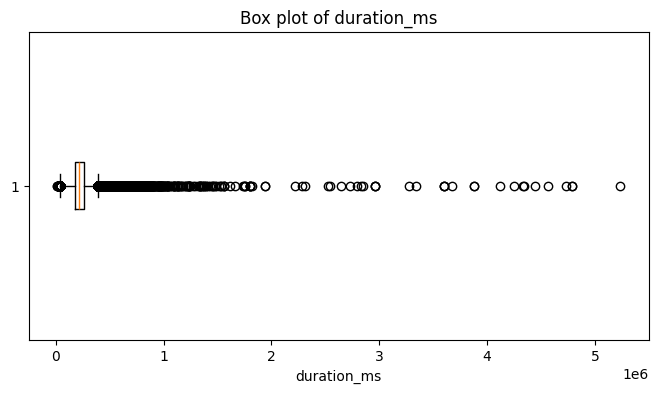

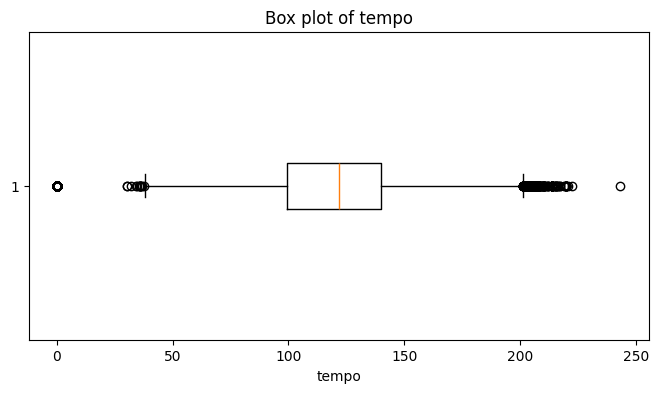

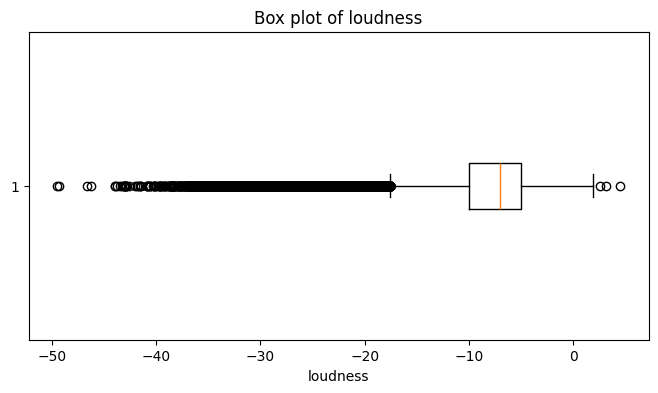

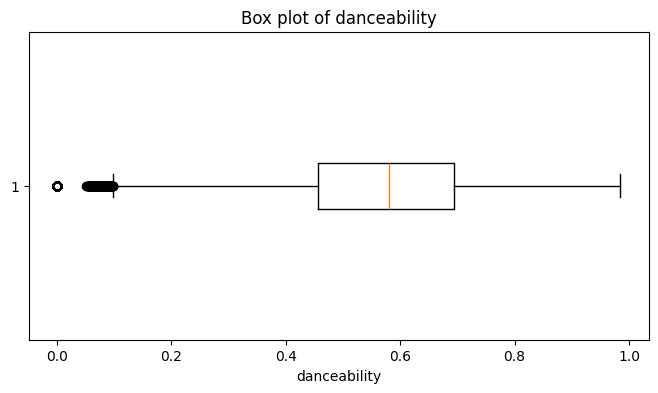

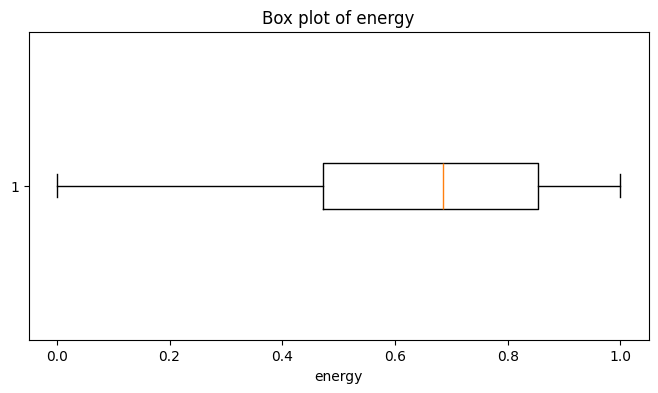

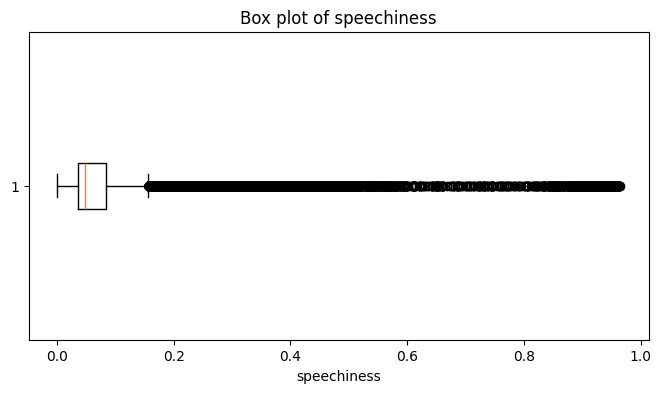

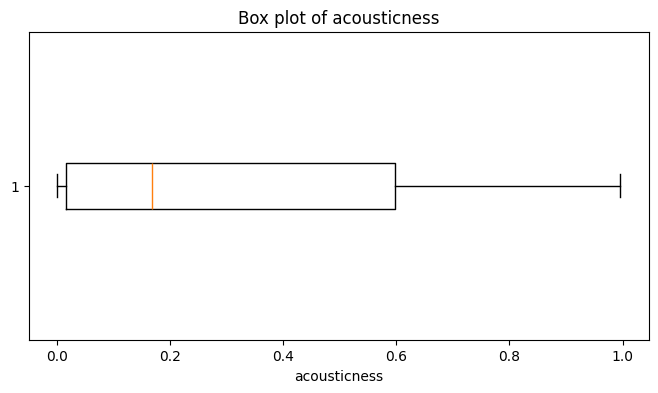

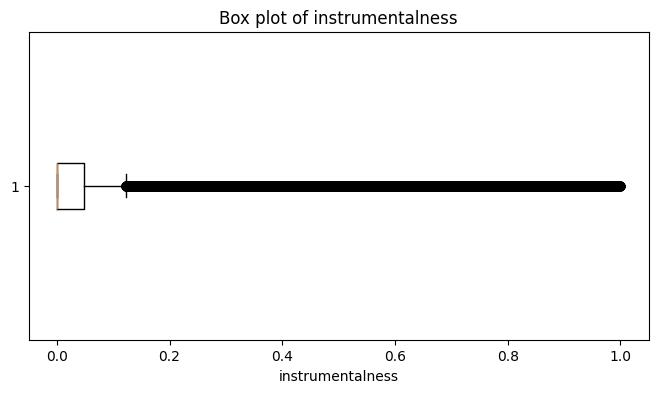

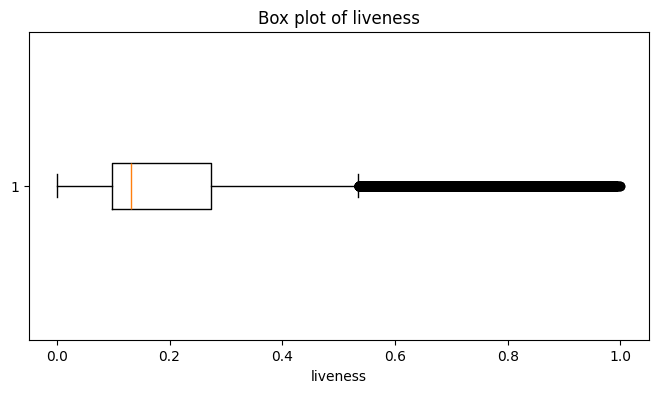

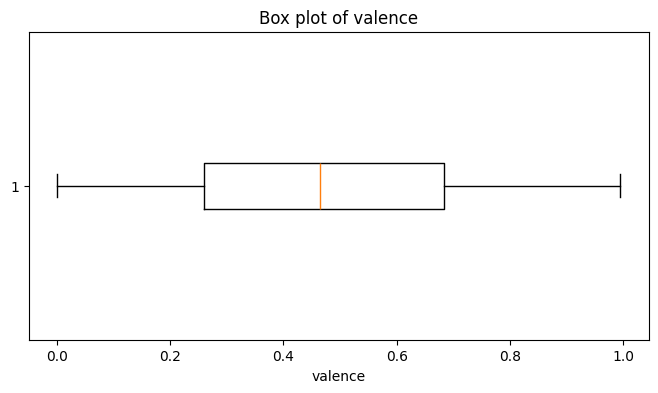

In [112]:
# checking for outliers in numerical columns using box plots
numerical_columns = ["popularity", "duration_ms", "tempo", "loudness", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

# We can see that some features are skewer, but if we train models like XGBoost, for ensemble methods, we need not do any transformations
# There are some outliers as well, but we still need to keep them since they are real songs and removing them would lead to loss of information
# Hence, we will not be doing any outlier removal or transformations for skewness at this point

# If required for training (linear models or nerual networks), we can always do log transformations or apply standardization/normalization later

In [113]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [114]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  int64  
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Exploratory Data Analysis (EDA)

In [ ]:
#attempt visualizing a headmap 
#use only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

#compute correlation matrix
corr = numeric_df.corr()

#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

""" OBSERVATIONS:
Generally a lot more negative corrolation than positive ones.

Song Type
    Negative corrolation: 
        energy + acousticness
        loudness + acousticness
        loudness + instrumentalness
        valence + instrumentalness
    
    Positive corrolation:
        loudness + energy
        loudness + danceability
        danceability + valence
        energy + valence
        speechiness + explicit

Popularity
    Negative corrolation:
        popularity + instrumentalness
        popularity + duration_ms

    No positive corrolation :((
"""

In [ ]:
# Try normalizing using log_scale to address highly skewed datasets
plt.figure(figsize=(12, 8))
sns.heatmap(corr, norm=mcolors.LogNorm(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features (Log Scaled)")
plt.show()

""" OBSERVATIONS:
Generally a lot more positive corrolations

Popularity
    Negative corrolation:
        energy
        tempo

    Positive corrolation:
        explicit
        danceability
        loudness
        time_signature
"""
# dig deeper into the significant corrolations

## Model Training

## Model Evaluation